# Used Cars Regression
# Process
______________________________________________________________________
   1. Load Data
   2. Data Preprocessing
       * Column Transformer 
       * Normilazation(MinMaxScalar)
       * Train Test spilit
   3. Build the Model
   4. Evaluate the Model
   5. Predict the test

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
# import data
used_cars = pd.read_csv("./usedcars.csv")
used_cars

,year,model,price,mileage,color,transmission
0,2011,SEL,21992,7413,Yellow,AUTO
1,2011,SEL,20995,10926,Gray,AUTO
2,2011,SEL,19995,7351,Silver,AUTO
3,2011,SEL,17809,11613,Gray,AUTO
4,2012,SE,17500,8367,White,AUTO
...,...,...,...,...,...,...
145,2006,SES,6200,95000,Silver,AUTO
146,2002,SE,5995,87003,Red,AUTO
147,2000,SE,5980,96841,Red,AUTO
148,2001,SE,4899,151479,Yellow,AUTO


In [3]:
used_cars.isnull().sum()

year            0
model           0
price           0
mileage         0
color           0
transmission    0
dtype: int64

In [4]:
# import libraries required for data preprocessing
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer model
ct = make_column_transformer(
    (MinMaxScaler(), ["year", "mileage"]), # turn the values in list into 0 & 1
    (OneHotEncoder(handle_unknown="ignore"), ["model", "color", "transmission"])
)

# Create X & y (label and feature seperation)
X = used_cars.drop("price", axis=1)
y = used_cars["price"]

# Bulid train test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer model to our X_train data
ct.fit(X_train)

# Transform the training and test data
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [5]:
X_train

,year,model,mileage,color,transmission
22,2011,SE,36685,Silver,AUTO
15,2011,SES,16368,Blue,AUTO
65,2010,SE,31414,Black,AUTO
11,2011,SES,9199,Silver,AUTO
42,2010,SES,22143,Black,MANUAL
...,...,...,...,...,...
71,2009,SES,38380,Black,AUTO
106,2010,SE,39722,Green,AUTO
14,2011,SE,15367,White,AUTO
92,2009,SE,31538,Gray,AUTO


In [6]:
X_train_normal

array([[0.91666667, 0.2170218 , 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.91666667, 0.07844515, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.83333333, 0.18106976, 1.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.91666667, 0.0716176 , 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.75      , 0.18191553, 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.75      , 0.21319537, 1.        , ..., 0.        , 1.        ,
        0.        ]])

In [7]:
# Build a neural network model

# set random seed
tf.random.set_seed(42)

# Build a model
used_cars_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

# Compile the model
used_cars_model.compile(loss=tf.keras.losses.mae,
                       optimizer=tf.keras.optimizers.Adam(lr=0.0001),
                       metrics=['mae'])

# Fit the model
history = used_cars_model.fit(X_train_normal, y_train, epochs=400)

Epoch 1/400


2023-07-02 07:05:47.584251: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


4/4 [==============================] - 0s 21ms/step - loss: 13025.1084 - mae: 13025.1084
Epoch 2/400
4/4 [==============================] - 0s 8ms/step - loss: 13023.0537 - mae: 13023.0537
Epoch 3/400
4/4 [==============================] - 0s 7ms/step - loss: 13020.3379 - mae: 13020.3379
Epoch 4/400
4/4 [==============================] - 0s 8ms/step - loss: 13016.4463 - mae: 13016.4463
Epoch 5/400
4/4 [==============================] - 0s 8ms/step - loss: 13010.7959 - mae: 13010.7959
Epoch 6/400
4/4 [==============================] - 0s 8ms/step - loss: 13002.4707 - mae: 13002.4707
Epoch 7/400
4/4 [==============================] - 0s 8ms/step - loss: 12990.5684 - mae: 12990.5684
Epoch 8/400
4/4 [==============================] - 0s 7ms/step - loss: 12973.6621 - mae: 12973.6621
Epoch 9/400
4/4 [==============================] - 0s 7ms/step - loss: 12950.3379 - mae: 12950.3379
Epoch 10/400
4/4 [==============================] - 0s 8ms/step - loss: 12918.2441 - mae: 12918.2441
Epoch 11/4

4/4 [==============================] - 0s 7ms/step - loss: 1505.8557 - mae: 1505.8557
Epoch 84/400
4/4 [==============================] - 0s 7ms/step - loss: 1501.8010 - mae: 1501.8010
Epoch 85/400
4/4 [==============================] - 0s 7ms/step - loss: 1495.0726 - mae: 1495.0726
Epoch 86/400
4/4 [==============================] - 0s 7ms/step - loss: 1491.4132 - mae: 1491.4132
Epoch 87/400
4/4 [==============================] - 0s 7ms/step - loss: 1482.4702 - mae: 1482.4702
Epoch 88/400
4/4 [==============================] - 0s 7ms/step - loss: 1482.7640 - mae: 1482.7640
Epoch 89/400
4/4 [==============================] - 0s 7ms/step - loss: 1472.4646 - mae: 1472.4646
Epoch 90/400
4/4 [==============================] - 0s 7ms/step - loss: 1468.7467 - mae: 1468.7467
Epoch 91/400
4/4 [==============================] - 0s 7ms/step - loss: 1458.4823 - mae: 1458.4823
Epoch 92/400
4/4 [==============================] - 0s 7ms/step - loss: 1455.9286 - mae: 1455.9286
Epoch 93/400
4/4 [=====

4/4 [==============================] - 0s 8ms/step - loss: 1065.2042 - mae: 1065.2042
Epoch 166/400
4/4 [==============================] - 0s 7ms/step - loss: 1063.1952 - mae: 1063.1952
Epoch 167/400
4/4 [==============================] - 0s 7ms/step - loss: 1057.8446 - mae: 1057.8446
Epoch 168/400
4/4 [==============================] - 0s 7ms/step - loss: 1060.4886 - mae: 1060.4886
Epoch 169/400
4/4 [==============================] - 0s 7ms/step - loss: 1058.6472 - mae: 1058.6472
Epoch 170/400
4/4 [==============================] - 0s 7ms/step - loss: 1054.3951 - mae: 1054.3951
Epoch 171/400
4/4 [==============================] - 0s 7ms/step - loss: 1045.3429 - mae: 1045.3429
Epoch 172/400
4/4 [==============================] - 0s 7ms/step - loss: 1046.2072 - mae: 1046.2072
Epoch 173/400
4/4 [==============================] - 0s 7ms/step - loss: 1039.5256 - mae: 1039.5256
Epoch 174/400
4/4 [==============================] - 0s 7ms/step - loss: 1044.7068 - mae: 1044.7068
Epoch 175/400


4/4 [==============================] - 0s 7ms/step - loss: 920.9154 - mae: 920.9154
Epoch 249/400
4/4 [==============================] - 0s 7ms/step - loss: 926.5293 - mae: 926.5293
Epoch 250/400
4/4 [==============================] - 0s 7ms/step - loss: 921.3156 - mae: 921.3156
Epoch 251/400
4/4 [==============================] - 0s 7ms/step - loss: 922.5155 - mae: 922.5155
Epoch 252/400
4/4 [==============================] - 0s 7ms/step - loss: 931.7693 - mae: 931.7693
Epoch 253/400
4/4 [==============================] - 0s 7ms/step - loss: 924.4226 - mae: 924.4226
Epoch 254/400
4/4 [==============================] - 0s 7ms/step - loss: 926.4888 - mae: 926.4888
Epoch 255/400
4/4 [==============================] - 0s 7ms/step - loss: 919.7520 - mae: 919.7520
Epoch 256/400
4/4 [==============================] - 0s 7ms/step - loss: 925.1327 - mae: 925.1327
Epoch 257/400
4/4 [==============================] - 0s 7ms/step - loss: 919.8716 - mae: 919.8716
Epoch 258/400
4/4 [===============

4/4 [==============================] - 0s 7ms/step - loss: 907.1808 - mae: 907.1808
Epoch 332/400
4/4 [==============================] - 0s 7ms/step - loss: 910.2015 - mae: 910.2015
Epoch 333/400
4/4 [==============================] - 0s 7ms/step - loss: 907.8419 - mae: 907.8419
Epoch 334/400
4/4 [==============================] - 0s 7ms/step - loss: 915.2410 - mae: 915.2410
Epoch 335/400
4/4 [==============================] - 0s 7ms/step - loss: 918.3197 - mae: 918.3197
Epoch 336/400
4/4 [==============================] - 0s 7ms/step - loss: 912.0982 - mae: 912.0982
Epoch 337/400
4/4 [==============================] - 0s 7ms/step - loss: 907.9285 - mae: 907.9285
Epoch 338/400
4/4 [==============================] - 0s 6ms/step - loss: 911.3389 - mae: 911.3389
Epoch 339/400
4/4 [==============================] - 0s 7ms/step - loss: 908.5509 - mae: 908.5509
Epoch 340/400
4/4 [==============================] - 0s 7ms/step - loss: 908.4435 - mae: 908.4435
Epoch 341/400
4/4 [===============

Text(0.5, 0, 'epochs')

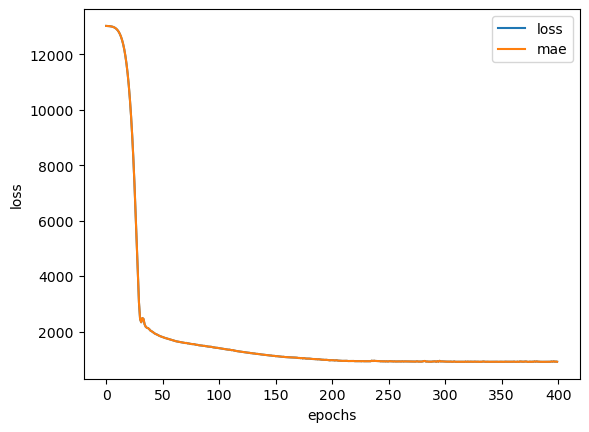

In [8]:
# plot the training curve
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [9]:
used_cars_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1700      
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 22,001
Trainable params: 22,001
Non-trainable params: 0
_________________________________________________________________


In [10]:
# evaluate the model
used_cars_model.evaluate(X_test_normal, y_test)

1/1 [==============================] - 0s 81ms/step - loss: 1123.0756 - mae: 1123.0756


[1123.0755615234375, 1123.0755615234375]

In [11]:
y_pred = used_cars_model.predict(X_test_normal)

1/1 [==============================] - 0s 40ms/step


In [12]:
y_pred

array([[15944.341],
       [17422.018],
       [10413.87 ],
       [13747.196],
       [12446.322],
       [12430.073],
       [14229.272],
       [10108.317],
       [13103.804],
       [11416.253],
       [ 9339.203],
       [16916.129],
       [15652.04 ],
       [15142.579],
       [17067.549],
       [13743.497],
       [12675.695],
       [13150.69 ],
       [15458.215],
       [ 9132.812],
       [15688.763],
       [10601.675],
       [14971.208],
       [10259.306],
       [10154.185],
       [ 9782.601],
       [11990.659],
       [ 7443.019],
       [15152.749],
       [14285.519]], dtype=float32)

In [13]:
# mae & mse
mae = tf.metrics.mae(y_true=y_test, y_pred=tf.squeeze(y_pred))
mse = tf.metrics.mse(y_true=y_test, y_pred=tf.squeeze(y_pred))
mae, mse

(<tf.Tensor: shape=(), dtype=float32, numpy=1123.0756>,
 <tf.Tensor: shape=(), dtype=float32, numpy=2004916.4>)

In [14]:
# first test fresh start
"""
dense: 3 : (100, 10, 1)
epochs: 100

optimizer: Adam
loss: 10312.3584 - mae: 10312.3584

optimizer: SGD
loss: 6300.0332 - mae: 6300.0332
"""

# second exp fresh start
"""
dense: 3 : (100, 100, 1)
epochs: 100

optimizer: SGD
loss: 5721.6479 - mae: 5721.6479

optimizer: Adam
loss: 2078.9150 - mae: 2078.9150
"""


# third exp fresh start
"""
dense: 3 : (100, 100, 1)
epochs: 200

optimizer: SGD
- loss: 6666.4175 - mae: 6666.4175

optimizer: Adam
loss: 1605.9569 - mae: 1605.9569
"""

# fourth exp fresh start
"""
dense: 3 : (100, 100, 1)
epochs: 300

optimizer: SGD
loss: 5559.9033 - mae: 5559.9033

optimizer: Adam
loss: 1401.0839 - mae: 1401.0839

optimizer: Adam(lr=0.0001)
loss: 1391.3618 - mae: 1391.3618

optimizer: Adam(lr=0.01)
loss: 1403.1954 - mae: 1403.1954

"""

# fifth exp fresh start
"""
dense: 3 : (100, 100, 1)
epochs: 400

optimizer: Adam(lr=0.0001)
loss: 1191.1581 - mae: 1191.1581

"""

# sixth exp fresh start
"""
dense: 4 : (100, 100, 100, 1)
epochs: 400

optimizer: Adam(lr=0.0001)
loss: 907.7216 - mae: 907.7216

"""


'\ndense: 4 : (100, 100, 100, 1)\nepochs: 400\n\noptimizer: Adam(lr=0.0001)\nloss: 907.7216 - mae: 907.7216\n\n'

In [15]:
used_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   year          150 non-null    int64 
 1   model         150 non-null    object
 2   price         150 non-null    int64 
 3   mileage       150 non-null    int64 
 4   color         150 non-null    object
 5   transmission  150 non-null    object
dtypes: int64(3), object(3)
memory usage: 7.2+ KB


In [ ]:
tf.keras.Sequential([
    tf.keras.lyers.De
])